In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Superstore.csv')

In [4]:
# Hello there!!! In this notebook we will be looking through the Technology category to see what impact discountig has on it and see what improvements can be made, particulary in the loss making states.

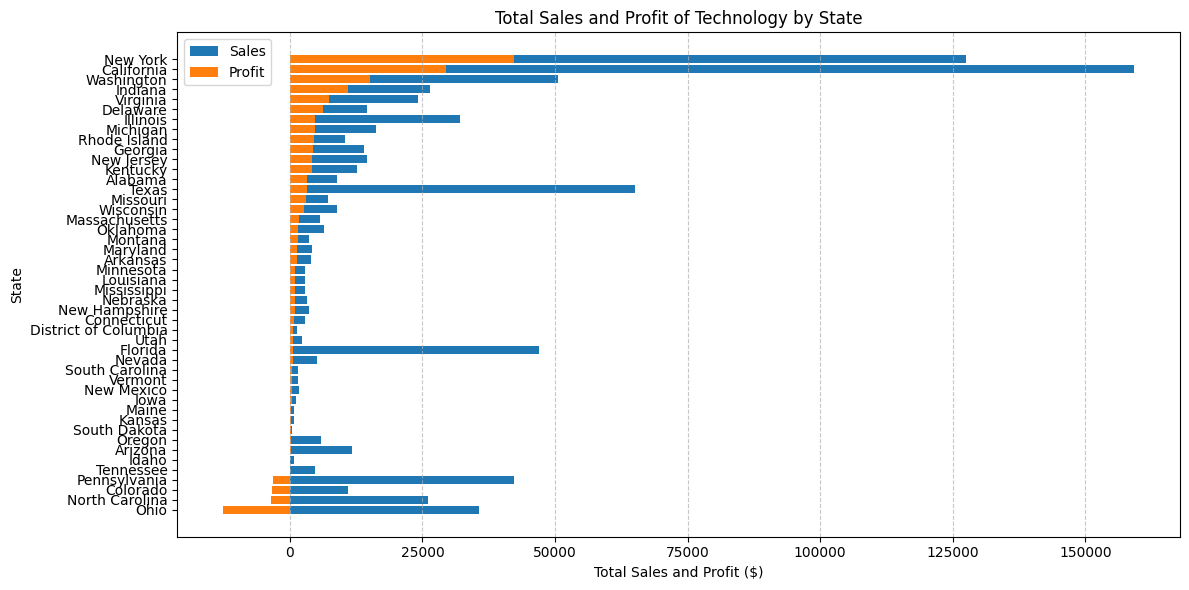

In [3]:
# Let's start tiwth a state wide view.

# Filter for Technology category
technology = df[df["Category"] == "Technology"]

# Group by State, then sum the Sales and Profit
technology_sales_profit = technology.groupby("State")[["Sales", "Profit"]].sum().reset_index()

# Sort by Profit (ascending)
technology_sales_profit = technology_sales_profit.sort_values(by="Profit")

# Plot total sales and profit by state
plt.figure(figsize=(12, 6))
plt.barh(technology_sales_profit["State"], technology_sales_profit["Sales"], label="Sales")
plt.barh(technology_sales_profit["State"], technology_sales_profit["Profit"], label="Profit")

# Formatting
plt.xlabel("Total Sales and Profit ($)")
plt.ylabel("State")
plt.title("Total Sales and Profit of Technology by State")
plt.legend()
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


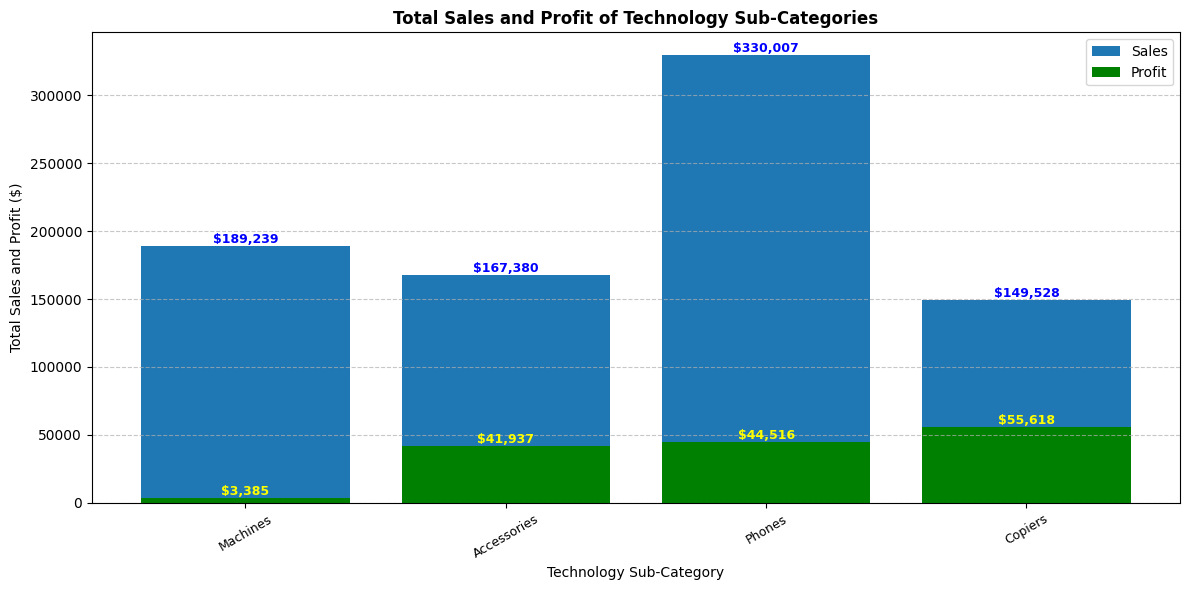

In [6]:
# Let's take a look at how the sub categories perform.

# Filter for Technology category only
technology_subcat_sales_profits = df[df["Category"] == "Technology"] \
    .groupby(["Sub-Category"])[["Sales", "Profit"]].sum().reset_index()

# Sort by Profit
technology_subcat_sales_profits = technology_subcat_sales_profits.sort_values(by="Profit")

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Bar chart for Sales
bars1 = ax.bar(technology_subcat_sales_profits["Sub-Category"],
               technology_subcat_sales_profits["Sales"], label='Sales')

# Bar chart for Profit
bars2 = ax.bar(technology_subcat_sales_profits["Sub-Category"],
               technology_subcat_sales_profits["Profit"], color= 'Green', label='Profit')

# Add labels on Sales bars
for bar in bars1:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f"${bar.get_height():,.0f}", ha='center', va='bottom', fontsize=9, color="blue", fontweight="bold")

# Add labels on Profit bars with adjustments for negative values
for bar in bars2:
    height = bar.get_height()
    va_position = 'bottom' if height >= 0 else 'top'
    offset = 5 if height >= 0 else -5
    ax.text(bar.get_x() + bar.get_width() / 2, height + offset,
            f"${height:,.0f}", ha='center', va=va_position, fontsize=9, color="Yellow", fontweight="bold")

# Formatting
ax.set_ylabel("Total Sales and Profit ($)", fontsize=10)
ax.set_xlabel("Technology Sub-Category", fontsize=10)
ax.set_title("Total Sales and Profit of Technology Sub-Categories", fontsize=12, fontweight="bold")
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xticks(range(len(technology_subcat_sales_profits["Sub-Category"])))
ax.set_xticklabels(technology_subcat_sales_profits["Sub-Category"], rotation=30, fontsize=9)

# Adjust layout for clarity
plt.tight_layout()
plt.show()


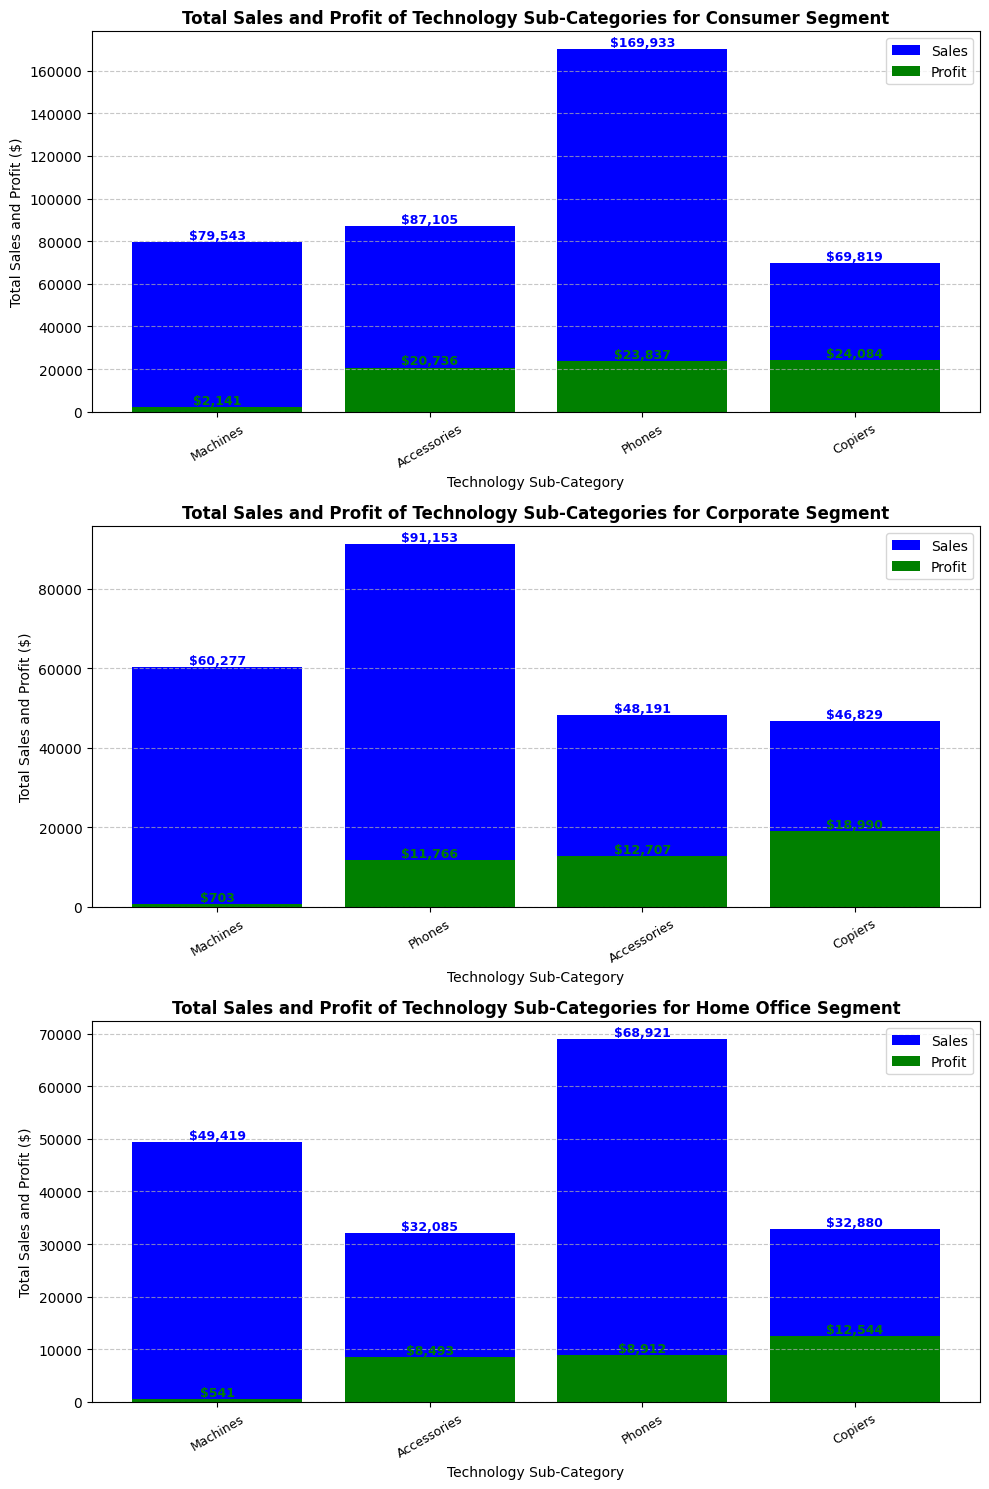

In [7]:
# Now let's take a peek at consumer segments.

# Filter for Technology category and group by Segment and Sub-Category
tech_segment_sales_profits = df[df["Category"] == "Technology"].groupby(
    ["Segment", "Sub-Category"]
)[["Sales", "Profit"]].sum().reset_index()

# Sort by Segment and then Profit
tech_segment_sales_profits = tech_segment_sales_profits.sort_values(by=["Segment", "Profit"])

# Get unique customer segments
segments = tech_segment_sales_profits["Segment"].unique()

# Create subplots for each customer segment
fig, axes = plt.subplots(nrows=len(segments), figsize=(10, len(segments) * 5))

# Ensure axes is iterable even if there's only one subplot
if len(segments) == 1:
    axes = [axes]

# Loop through each segment and plot sales & profit for sub-categories
for i, segment in enumerate(segments):
    segment_data = tech_segment_sales_profits[tech_segment_sales_profits["Segment"] == segment]

    # Create subplot for this segment
    ax = axes[i]

    # Bar chart for Sales
    bars1 = ax.bar(segment_data["Sub-Category"], segment_data["Sales"], color='blue', label='Sales')

    # Bar chart for Profit
    bars2 = ax.bar(segment_data["Sub-Category"], segment_data["Profit"], color='green', label='Profit')

    # Add labels on Sales bars
    for bar in bars1:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"${bar.get_height():,.0f}",
                ha='center', va='bottom', fontsize=9, color="blue", fontweight="bold")

    # Add labels on Profit bars with adjustments for negative values
    for bar in bars2:
        height = bar.get_height()
        va_position = 'bottom' if height >= 0 else 'top'
        offset = 5 if height >= 0 else -5

        ax.text(bar.get_x() + bar.get_width()/2, height + offset, f"${height:,.0f}",
                ha='center', va=va_position, fontsize=9, color="green", fontweight="bold")

    # Formatting
    ax.set_ylabel("Total Sales and Profit ($)", fontsize=10)
    ax.set_xlabel("Technology Sub-Category", fontsize=10)
    ax.set_title(f"Total Sales and Profit of Technology Sub-Categories for {segment} Segment", fontsize=12, fontweight="bold")
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_xticks(range(len(segment_data["Sub-Category"])))
    ax.set_xticklabels(segment_data["Sub-Category"], rotation=30, fontsize=9)

# Adjust layout for clarity
plt.tight_layout()
plt.show()


In [ ]:
# A quick look tells us that Machines is the poorest performing sub-category with low profts compared to sales.
# Let's take a look at discount rates and see if that has any impact on the profit margins.


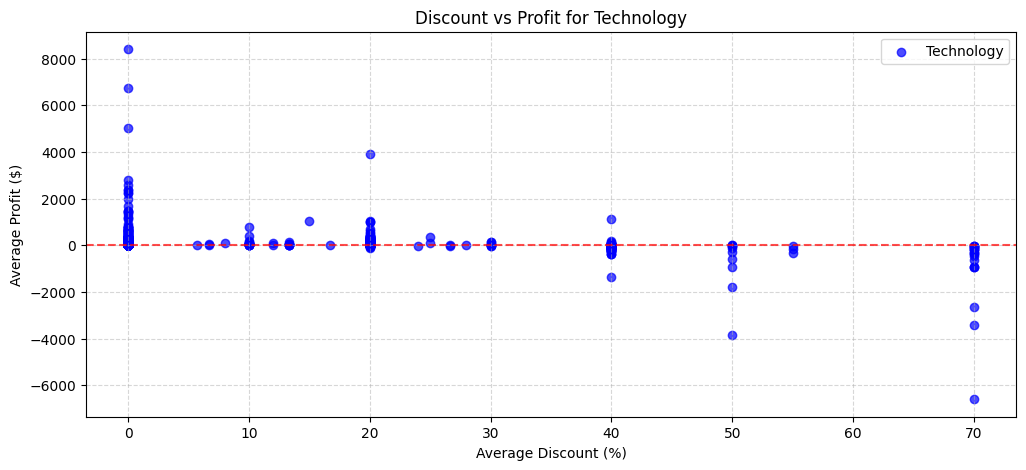

In [4]:
# Filter for Technology category
technology_discount = df[df["Category"] == "Technology"].groupby("Sales")[["Discount", "Profit"]].mean().reset_index()

# Plot discounting patterns for Technology
plt.figure(figsize=(12, 5))
plt.scatter(technology_discount["Discount"] * 100, technology_discount["Profit"],
            color='blue', label="Technology", alpha=0.7)
plt.xlabel("Average Discount (%)")
plt.ylabel("Average Profit ($)")
plt.title("Discount vs Profit for Technology")
plt.axhline(0, color="red", linestyle="--", alpha=0.7)  # Reference line for zero profit
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [ ]:
# Once again, the 20% mark is where losses beging to show.
# 15% seems to make little to no profts at all.

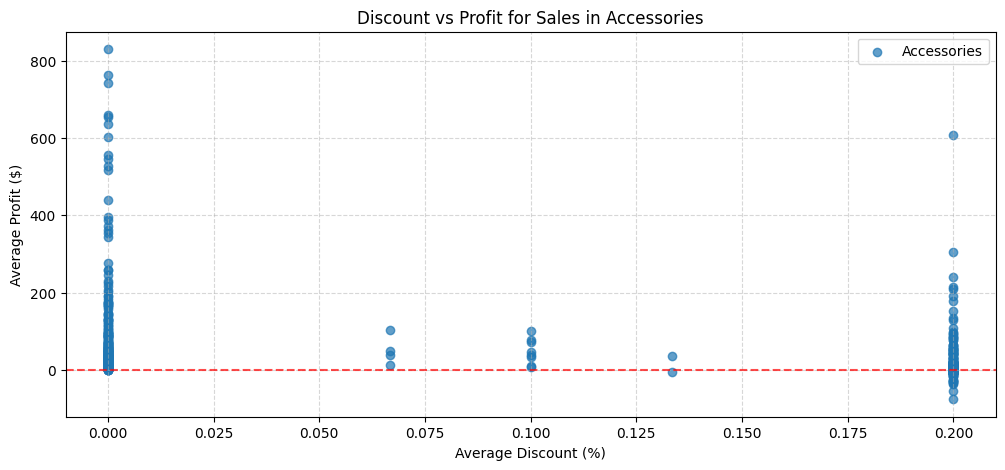

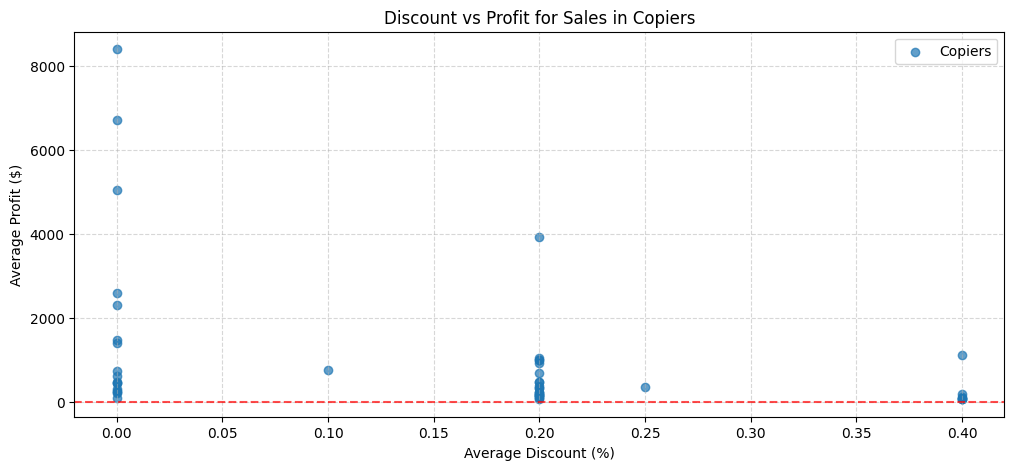

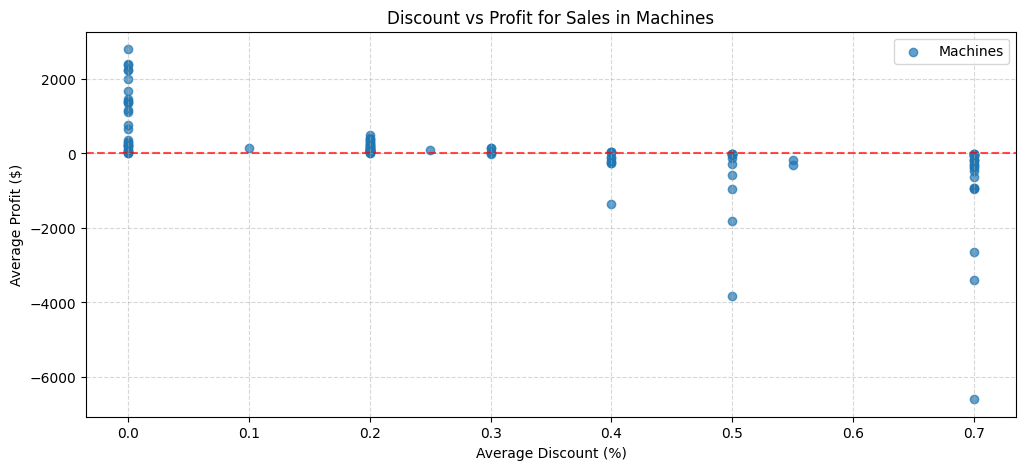

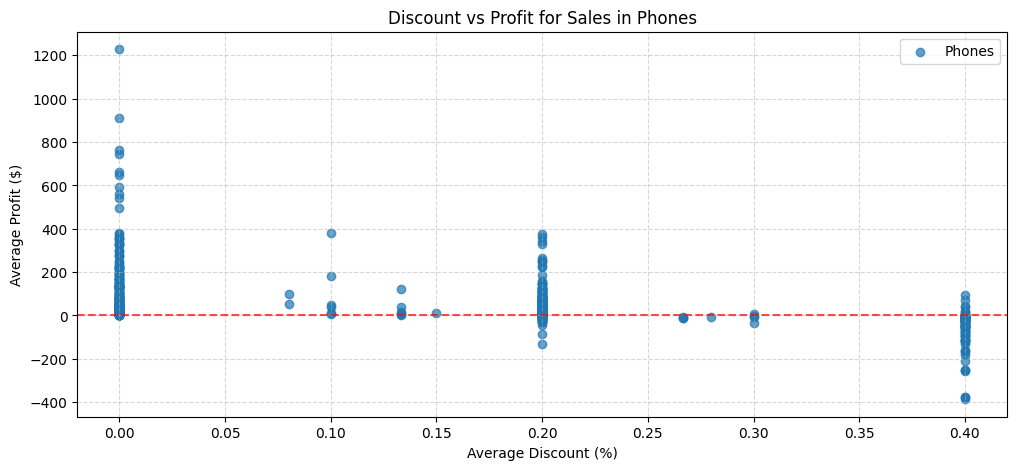

In [4]:
# Once again, let's take a look at the discounts and profits for the Technology sub categories, now by Sales.
# Filter data for Office Supplies category
office_supplies_discount_analysis = df[df["Category"] == "Technology"]

# Group by Sub-Category and State, calculate mean Discount and Profit
office_supplies_discount_analysis = office_supplies_discount_analysis.groupby(["Sub-Category", "Sales"])[["Discount", "Profit"]].mean().reset_index()

# Get unique sub-categories for Office Supplies
office_supplies_subcategories = office_supplies_discount_analysis["Sub-Category"].unique()

# Create scatter plots for each sub-category
for sub_category in office_supplies_subcategories:
    # Filter data for the current sub-category
    subcategory_discount_data = office_supplies_discount_analysis[office_supplies_discount_analysis["Sub-Category"] == sub_category]
    
    # Plot scatter plot for Discount vs Profit
    plt.figure(figsize=(12, 5))
    plt.scatter(subcategory_discount_data["Discount"], subcategory_discount_data["Profit"], alpha=0.7, label=sub_category)
    plt.xlabel("Average Discount (%)")
    plt.ylabel("Average Profit ($)")
    plt.title(f"Discount vs Profit for Sales in {sub_category}")
    plt.axhline(0, color="red", linestyle="--", alpha=0.7)  # Reference line for zero profit
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

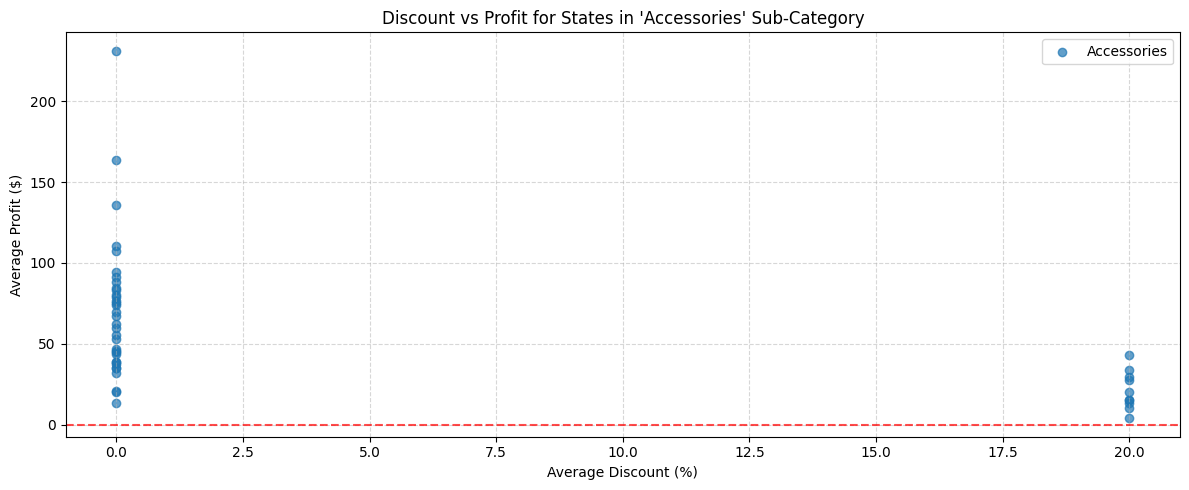

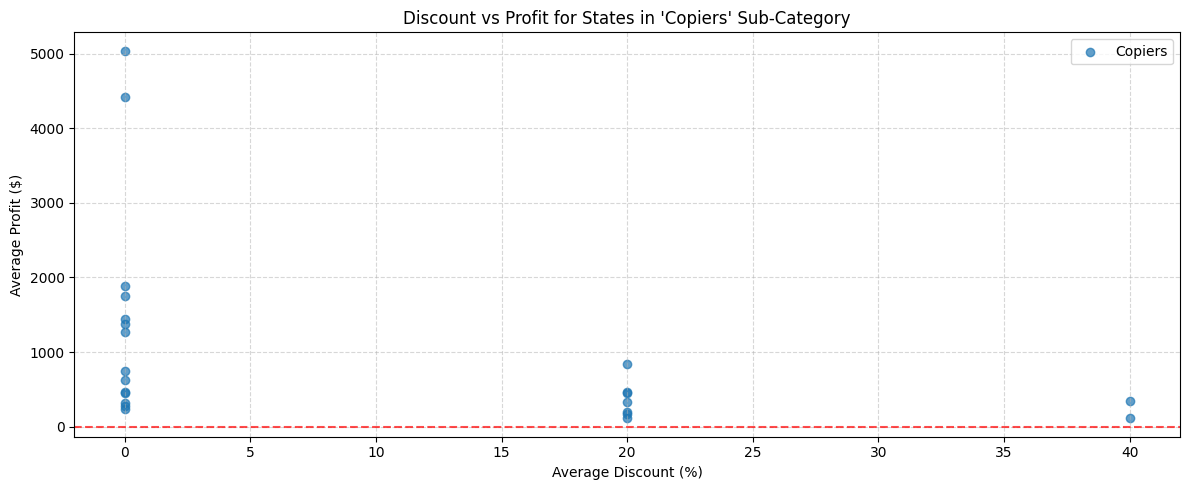

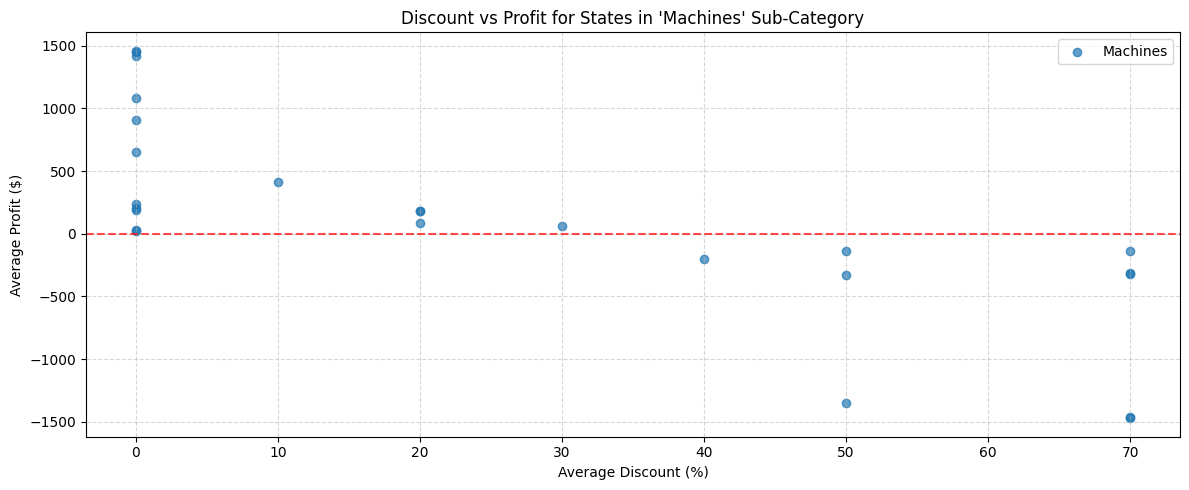

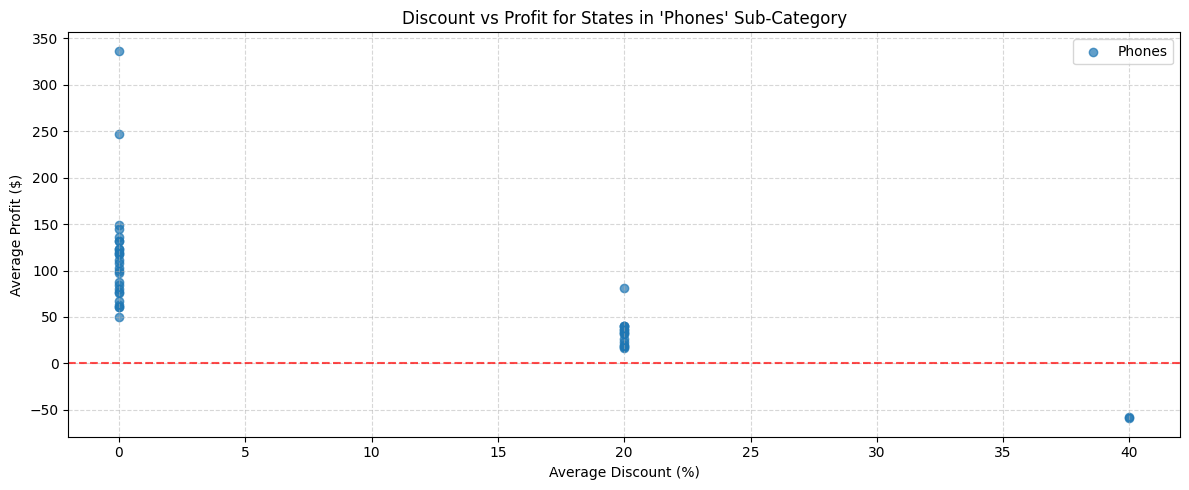

In [ ]:
# Let's tak a look at how discounts look at the sub-category level by State.

# Filter for Technology category
technology_discount_analysis = df[df["Category"] == "Technology"]

# Group by Sub-Category and State, calculate mean Discount and Profit
technology_discount_analysis = technology_discount_analysis.groupby(
    ["Sub-Category", "State"]
)[["Discount", "Profit"]].mean().reset_index()

# Get unique sub-categories for Technology
technology_subcategories = technology_discount_analysis["Sub-Category"].unique()

# Create scatter plots for each sub-category
for sub_category in technology_subcategories:
    # Filter data for the current sub-category
    subcategory_discount_data = technology_discount_analysis[
        technology_discount_analysis["Sub-Category"] == sub_category
    ]
    
    # Plot scatter plot for Discount vs Profit
    plt.figure(figsize=(12, 5))
    plt.scatter(subcategory_discount_data["Discount"] * 100, subcategory_discount_data["Profit"],
                alpha=0.7, label=sub_category)
    plt.xlabel("Average Discount (%)")
    plt.ylabel("Average Profit ($)")
    plt.title(f"Discount vs Profit for States in '{sub_category}' Sub-Category")
    plt.axhline(0, color="red", linestyle="--", alpha=0.7)  # Reference line for zero profit
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


In [ ]:
# Alright, with this we can see that the 20% mark does diminish profits but doesn't lead to losses in most sub categories.
# However, in the machines sub category 20 - 30% rates does lead to very low or almost no profits so that does need scaling back.
# Furthermore, any discount past the 30% rate leads to losses in the machines category so that should be done away with.

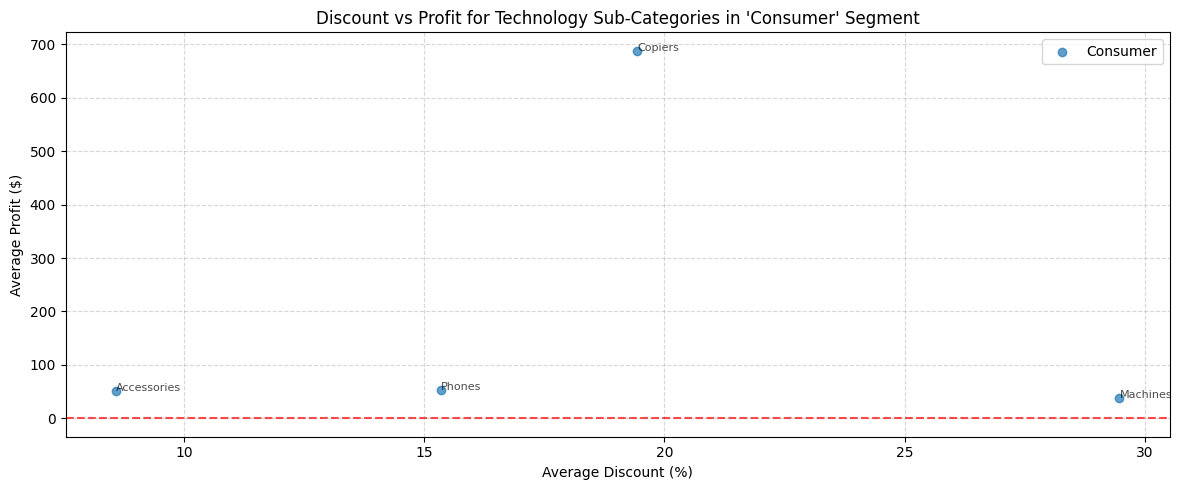

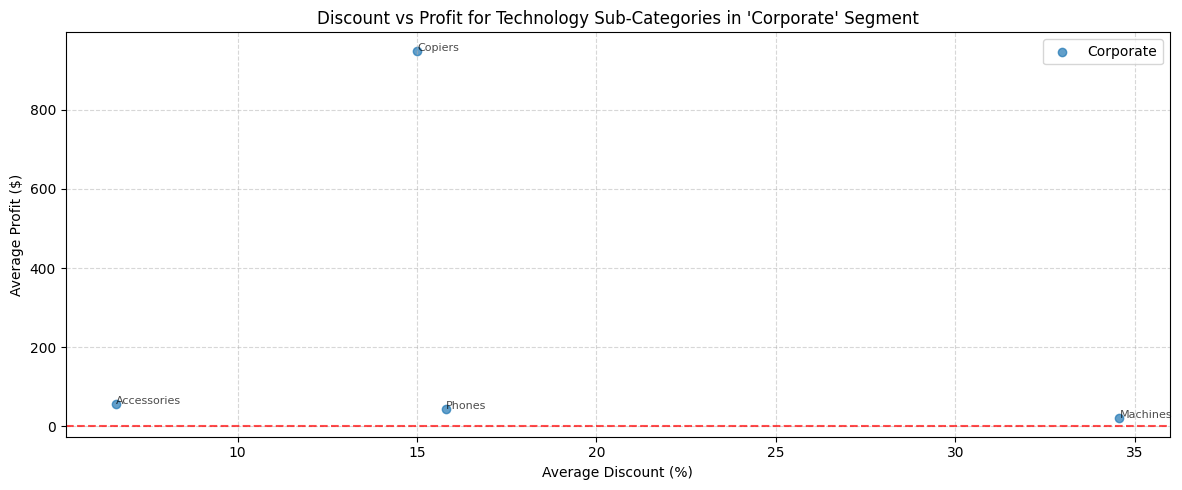

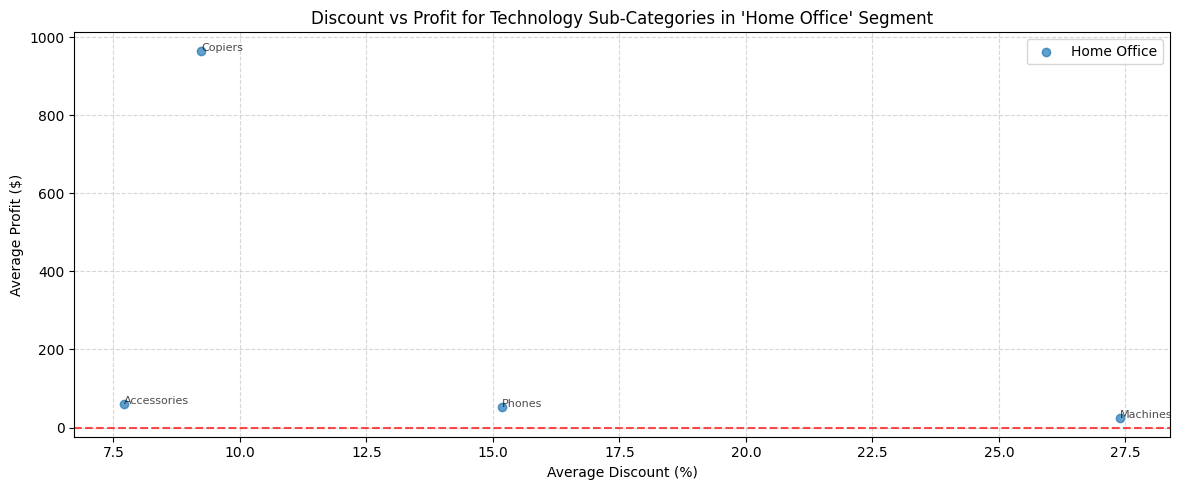

In [25]:
# Let's take a look at how customer segments are affected by discounting next.

# Filter for Technology category
technology_discount_segment_analysis = df[df["Category"] == "Technology"]

# Group by Segment and Sub-Category, calculate mean Discount and Profit
technology_discount_segment_analysis = technology_discount_segment_analysis.groupby(
    ["Segment", "Sub-Category"]
)[["Discount", "Profit"]].mean().reset_index()

# Get unique customer segments
segments = technology_discount_segment_analysis["Segment"].unique()

# Create scatter plots for each customer segment
for segment in segments:
    segment_discount_data = technology_discount_segment_analysis[
        technology_discount_segment_analysis["Segment"] == segment
    ]

    # Plot scatter plot for Discount vs Profit
    plt.figure(figsize=(12, 5))
    plt.scatter(segment_discount_data["Discount"] * 100, segment_discount_data["Profit"],
                alpha=0.7, label=segment)

    # Annotate each point with its sub-category
    for _, row in segment_discount_data.iterrows():
        plt.text(row["Discount"] * 100, row["Profit"], row["Sub-Category"],
                 fontsize=8, alpha=0.7)

    plt.xlabel("Average Discount (%)")
    plt.ylabel("Average Profit ($)")
    plt.title(f"Discount vs Profit for Technology Sub-Categories in '{segment}' Segment")
    plt.axhline(0, color="red", linestyle="--", alpha=0.7)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


In [ ]:
# Interesting, no customer segment is bringing in losses in the technology category as a whole.
# This means it might come down to discount strategies used by the loss making states.

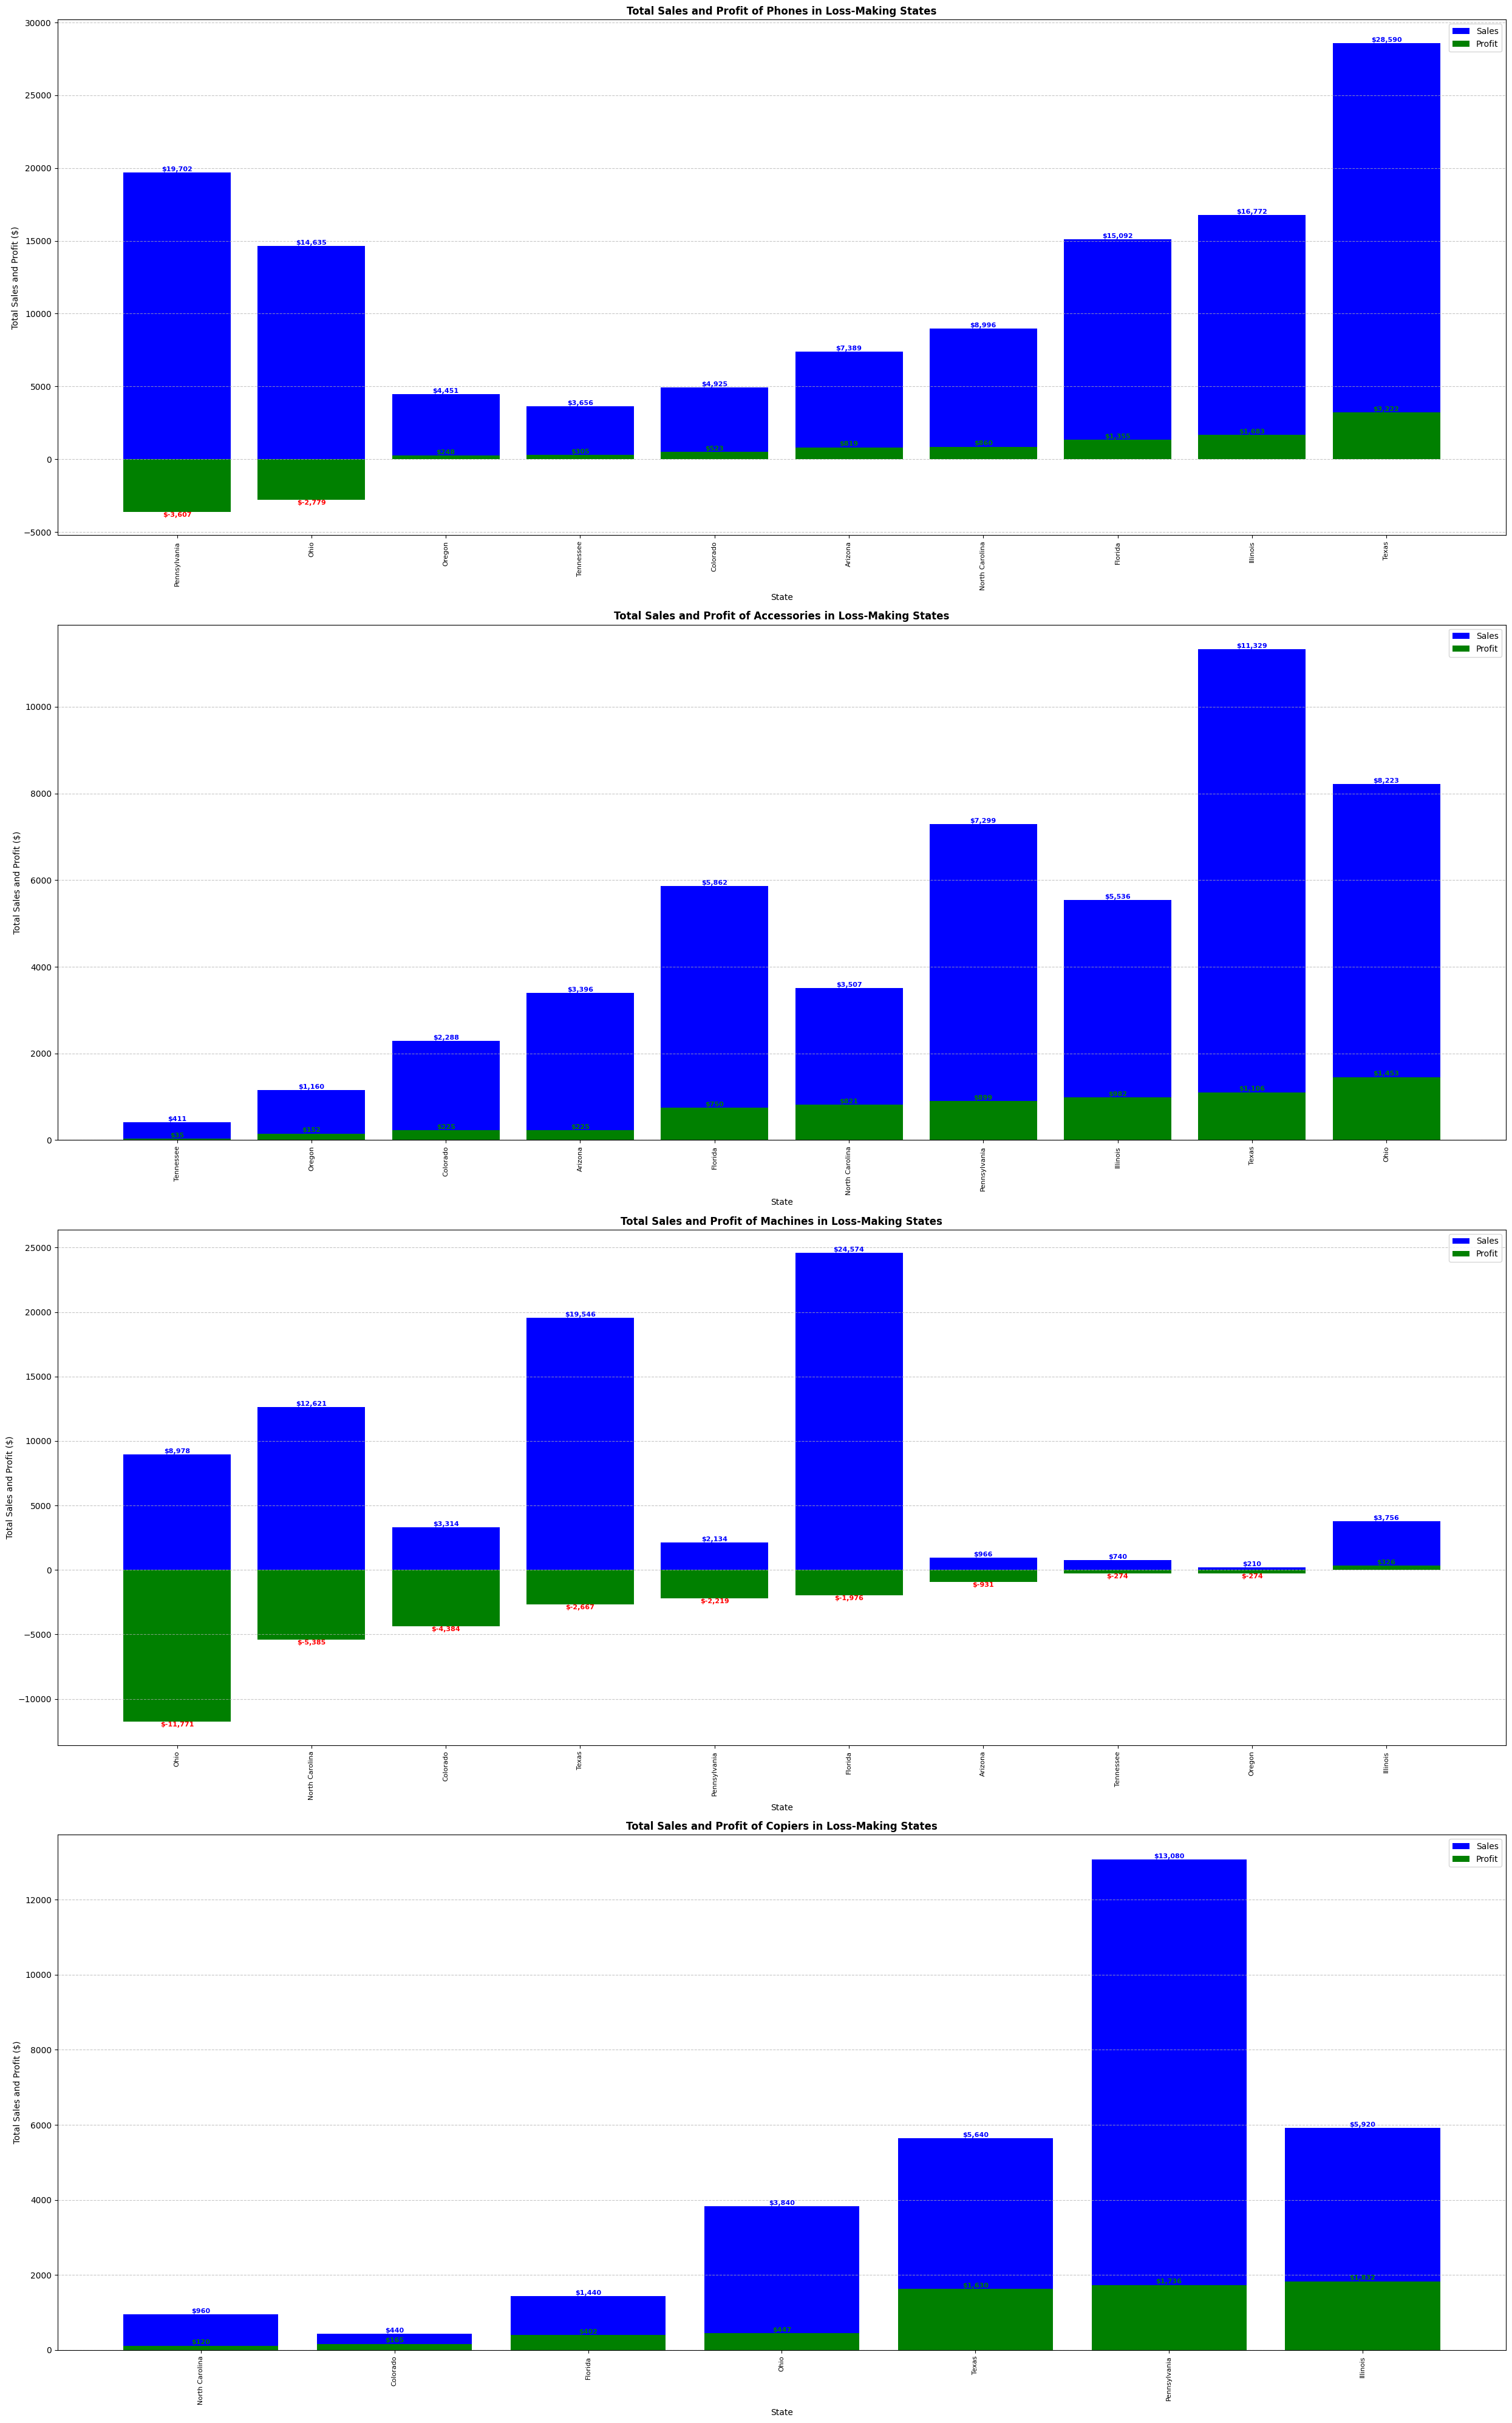

In [26]:
# Let's take at our loss making states in the Technology category next.

# Define loss-making states
loss_making_states = [
    "Texas", "Ohio", "Pennsylvania", "Illinois", "North Carolina",
    "Colorado", "Tennessee", "Arizona", "Florida", "Oregon"
]

# Get unique sub-categories for Technology
technology_subcategories = df[df["Category"] == "Technology"]["Sub-Category"].unique()

# Create subplots for each sub-category
fig, axes = plt.subplots(nrows=len(technology_subcategories), figsize=(25, len(technology_subcategories) * 10))

# Ensure axes is iterable even if there's only one subplot
if len(technology_subcategories) == 1:
    axes = [axes]

# Loop through each sub-category and plot a histogram-style bar chart for states
for i, sub_category in enumerate(technology_subcategories):
    # Filter data for the current sub-category and loss-making states
    subcategory_state_data = df[
        (df["Category"] == "Technology") &
        (df["Sub-Category"] == sub_category) &
        (df["State"].isin(loss_making_states))
    ]

    # Group by state and sum sales and profit
    state_sales_profits = subcategory_state_data.groupby("State")[["Sales", "Profit"]].sum().reset_index()
    state_sales_profits = state_sales_profits.sort_values(by='Profit')

    # Create subplot for this sub-category
    ax = axes[i]

    # Bar chart for Sales
    bars1 = ax.bar(state_sales_profits["State"], state_sales_profits["Sales"], color='blue', label='Sales')

    # Bar chart for Profit
    bars2 = ax.bar(state_sales_profits["State"], state_sales_profits["Profit"], color='green', label='Profit')

    # Add labels on Sales bars
    for bar in bars1:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"${bar.get_height():,.0f}",
                ha='center', va='bottom', fontsize=8, color="blue", fontweight="bold")

    # Add labels on Profit bars with color coding for losses
    for bar in bars2:
        height = bar.get_height()
        va_position = 'bottom' if height >= 0 else 'top'
        offset = 5 if height >= 0 else -5
        label_color = "green" if height > 0 else "red"
        ax.text(bar.get_x() + bar.get_width()/2, height + offset, f"${height:,.0f}",
                ha='center', va=va_position, fontsize=8, color=label_color, fontweight="bold")

    # Formatting
    ax.set_ylabel("Total Sales and Profit ($)", fontsize=10)
    ax.set_xlabel("State", fontsize=10)
    ax.set_title(f"Total Sales and Profit of {sub_category} in Loss-Making States", fontsize=12, fontweight="bold")
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_xticks(range(len(state_sales_profits["State"])))
    ax.set_xticklabels(state_sales_profits["State"], rotation=90, fontsize=8)

# Adjust layout
plt.tight_layout()
plt.show()




In [ ]:
# Machines and Phones are the biggest loss makers for Technology in these states.
# Let's take a closer look at their discounting strategies.

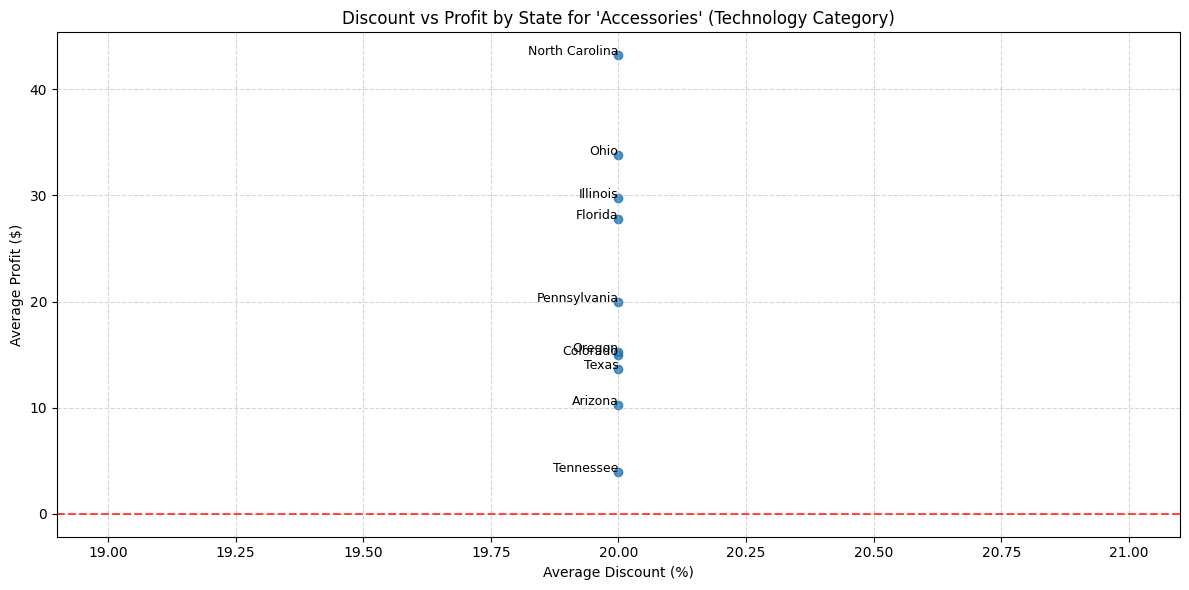

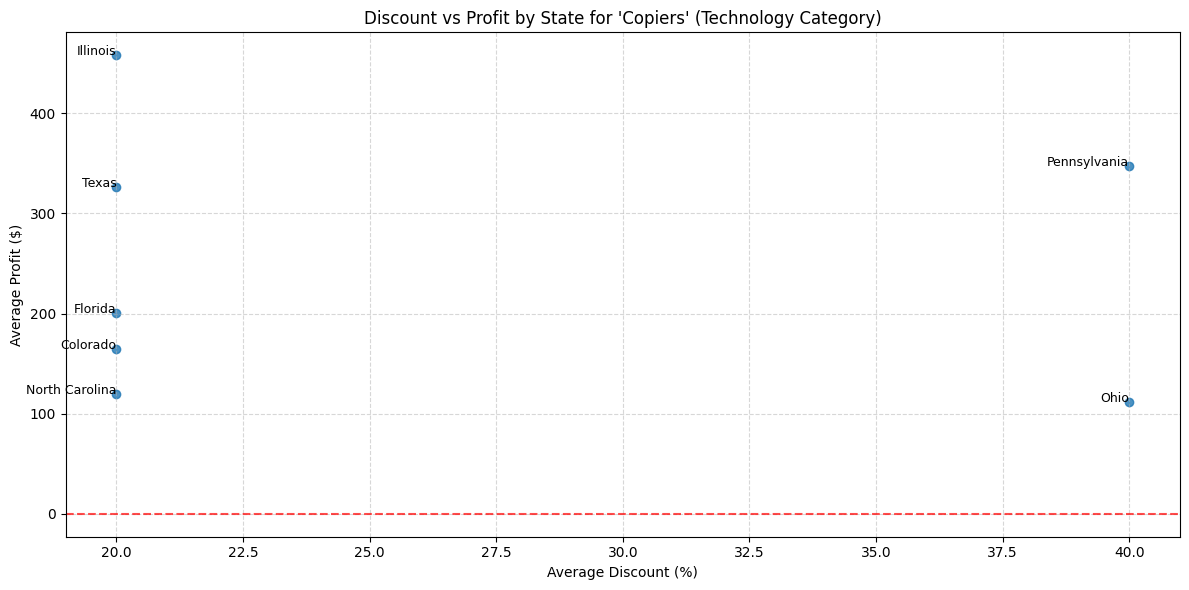

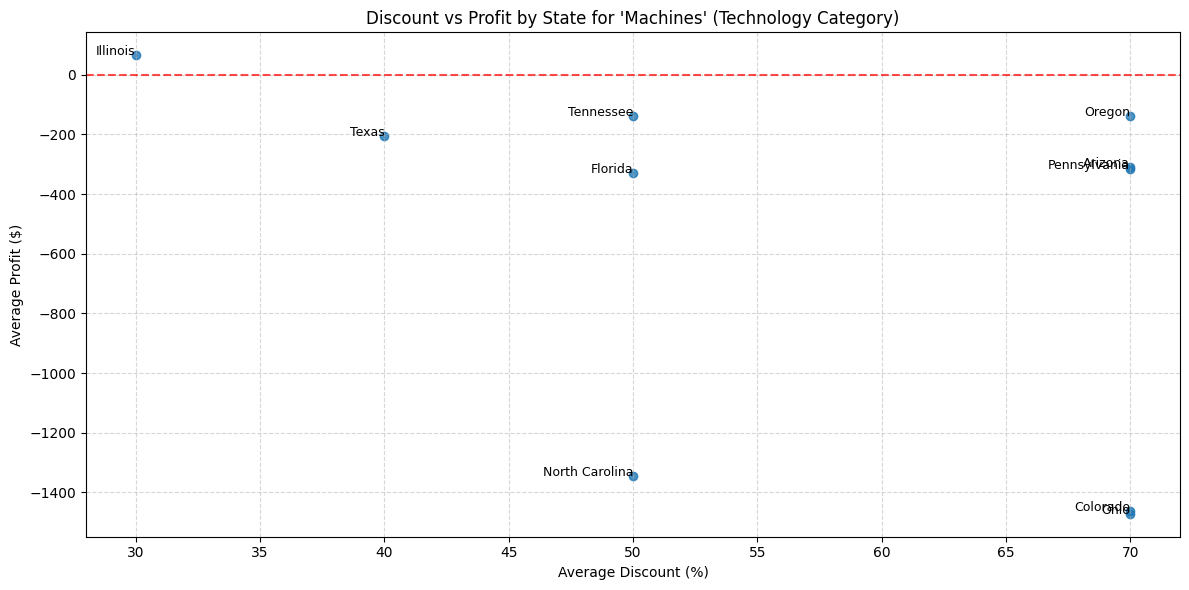

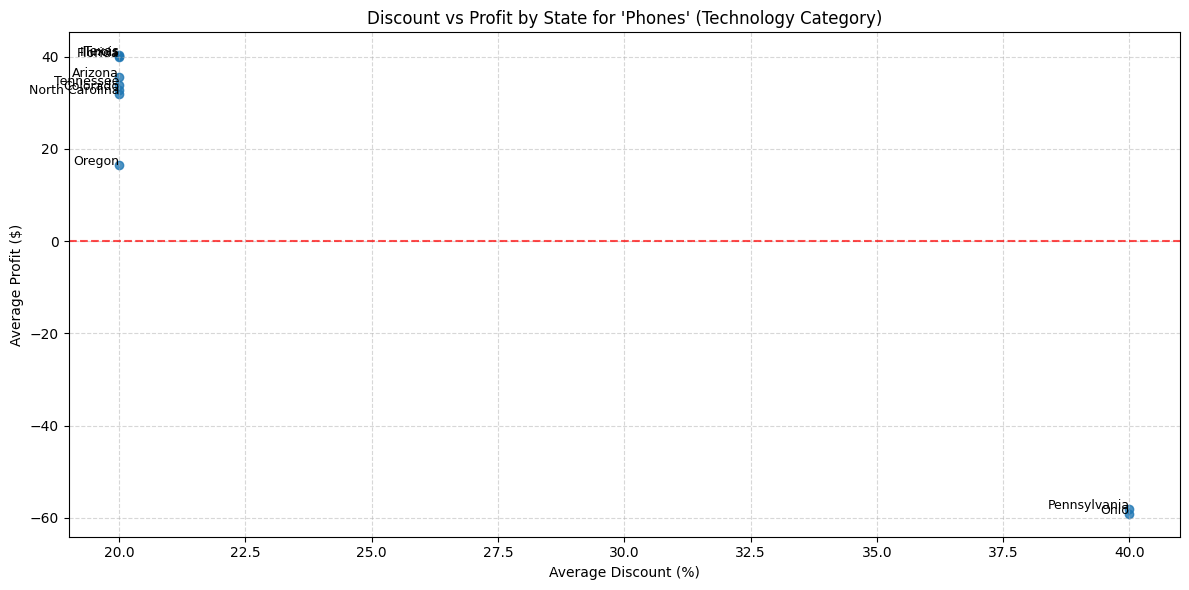

In [27]:
# Define the list of loss-making states to analyze
selected_states = [
    "Texas", "Ohio", "Pennsylvania", "Illinois", "North Carolina",
    "Colorado", "Tennessee", "Arizona", "Florida", "Oregon"
]

# Filter for Technology category and selected states
technology_selected_states = df[
    (df["Category"] == "Technology") &
    (df["State"].isin(selected_states))
]

# Group by Sub-Category and State, calculate mean Discount and Profit
tech_subcat_summary = technology_selected_states.groupby(
    ["Sub-Category", "State"]
)[["Discount", "Profit"]].mean().reset_index()

# Get unique sub-categories
subcategories = tech_subcat_summary["Sub-Category"].unique()

# Create scatter plots for each sub-category
for sub_category in subcategories:
    subcat_data = tech_subcat_summary[
        tech_subcat_summary["Sub-Category"] == sub_category
    ]
    
    plt.figure(figsize=(12, 6))
    plt.scatter(subcat_data["Discount"] * 100, subcat_data["Profit"], alpha=0.8)
    
    # Annotate points with state names
    for i, row in subcat_data.iterrows():
        plt.text(row["Discount"] * 100, row["Profit"], row["State"], fontsize=9, ha='right')
    
    plt.xlabel("Average Discount (%)")
    plt.ylabel("Average Profit ($)")
    plt.title(f"Discount vs Profit by State for '{sub_category}' (Technology Category)")
    plt.axhline(0, color="red", linestyle="--", alpha=0.7)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


In [ ]:
# With this, we can conclude that discounts past the 20% mark are not profitable for the Machines and Phones sub-categories in the loss making states.
# Furthermore the 20 - 30% discount bring in very low to almost no profits for the Machines sub-category.

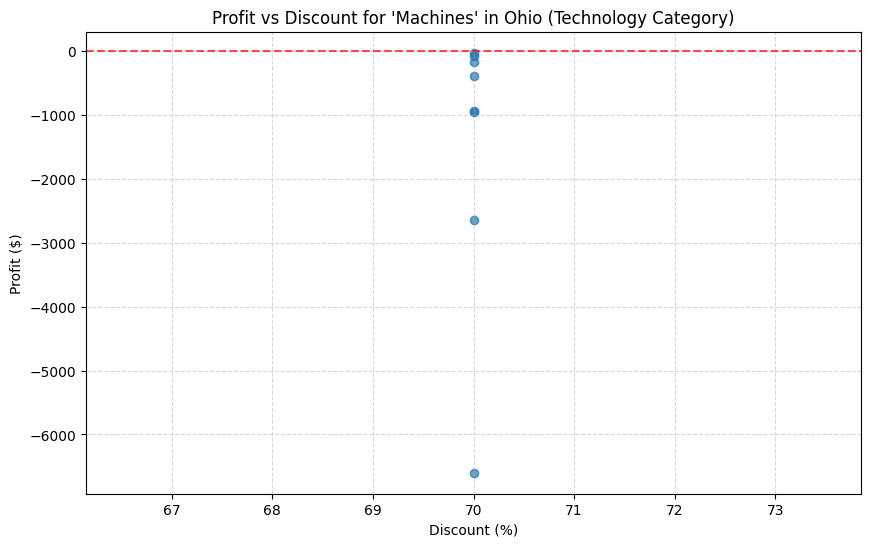

In [30]:
# Ohio generated the most losses in the Machines sub-category, let's take a closer look and see if we can fonrirm out theory.

# Filter dataset for Ohio and Machines sub-category in the Technology category
ohio_machines_data = df[
    (df["Category"] == "Technology") &
    (df["Sub-Category"] == "Machines") &
    (df["State"] == "Ohio")
]



# Plot Profit vs Discount scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ohio_machines_data["Discount"] * 100, ohio_machines_data["Profit"], alpha=0.7)
plt.xlabel("Discount (%)")
plt.ylabel("Profit ($)")
plt.title("Profit vs Discount for 'Machines' in Ohio (Technology Category)")
plt.axhline(0, color="red", linestyle="--", alpha=0.7)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


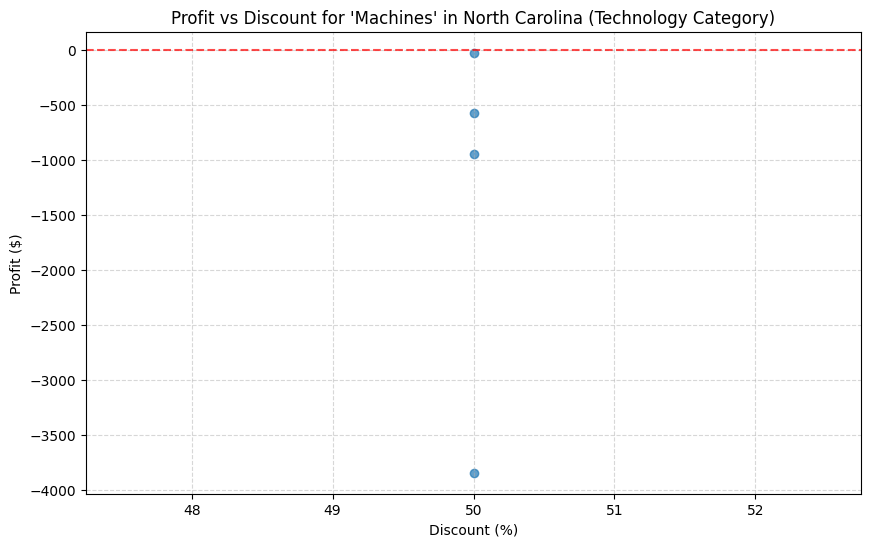

In [33]:
# North Carolina also generated losses in the Machines sub-category, let's take a closer look and see if we can fonrirm out theory.
NC_machines_data = df[
    (df["Category"] == "Technology") &
    (df["Sub-Category"] == "Machines") &
    (df["State"] == "North Carolina")
]



# Plot Profit vs Discount scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(NC_machines_data["Discount"] * 100, NC_machines_data["Profit"], alpha=0.7)
plt.xlabel("Discount (%)")
plt.ylabel("Profit ($)")
plt.title("Profit vs Discount for 'Machines' in North Carolina (Technology Category)")
plt.axhline(0, color="red", linestyle="--", alpha=0.7)
plt.grid(True, linestyle='--', alpha=0.5)

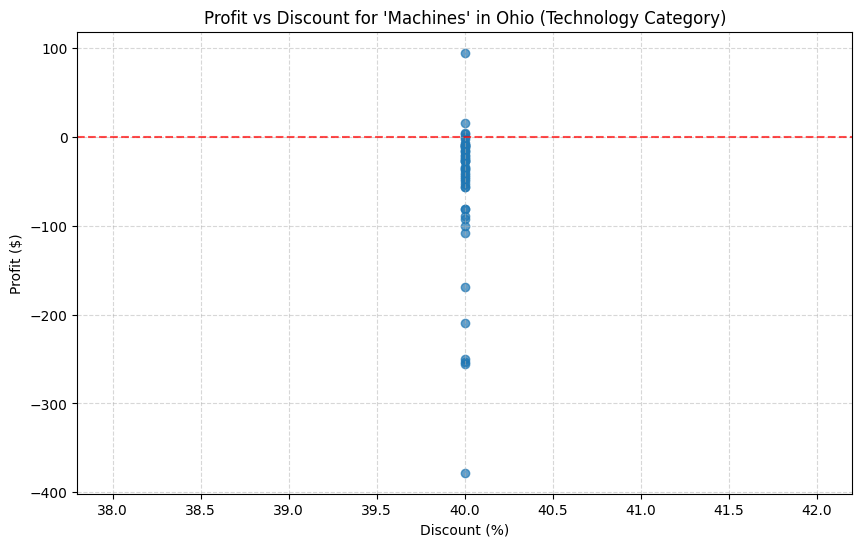

In [35]:
# Next up, let's look at Phones, once again in Ohio.

# Filter dataset for Ohio and Phones sub-category in the Technology category
ohio_phones_data = df[
    (df["Category"] == "Technology") &
    (df["Sub-Category"] == "Phones") &
    (df["State"] == "Ohio")
]



# Plot Profit vs Discount scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ohio_phones_data["Discount"] * 100, ohio_phones_data["Profit"], alpha=0.7)
plt.xlabel("Discount (%)")
plt.ylabel("Profit ($)")
plt.title("Profit vs Discount for 'Machines' in Ohio (Technology Category)")
plt.axhline(0, color="red", linestyle="--", alpha=0.7)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


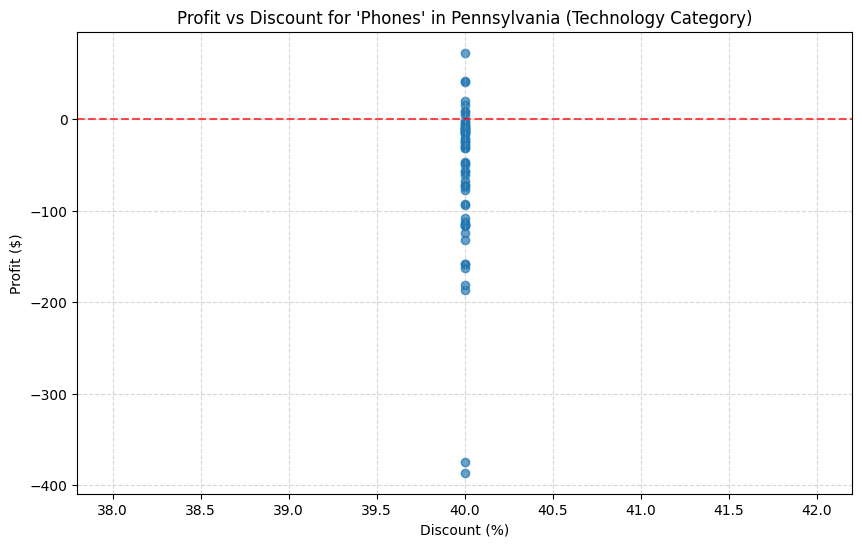

In [41]:
# 2nd biggest loss in Phones was in Pennsylvania, let's take a closer look and see if we can fonrirm out theory.

# Filter dataset for Ohio and Machines sub-category in the Technology category
Pennsylvania_phones_data = df[
    (df["Category"] == "Technology") &
    (df["Sub-Category"] == "Phones") &
    (df["State"] == "Pennsylvania")
]



# Plot Profit vs Discount scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(Pennsylvania_phones_data["Discount"] * 100, Pennsylvania_phones_data["Profit"], alpha=0.7)
plt.xlabel("Discount (%)")
plt.ylabel("Profit ($)")
plt.title("Profit vs Discount for 'Phones' in Pennsylvania (Technology Category)")
plt.axhline(0, color="red", linestyle="--", alpha=0.7)
plt.grid(True, linestyle='--', alpha=0.5)

In [ ]:
# And that confirms it, our loss making states in the Technology category are indeed discounting too much in the Machines and Phones sub-categories.
# The 20 - 30% discount rates are very low profit zones for Machines, past that point it's all losses. 
# The 20% mark is where Phones start to lose profits.

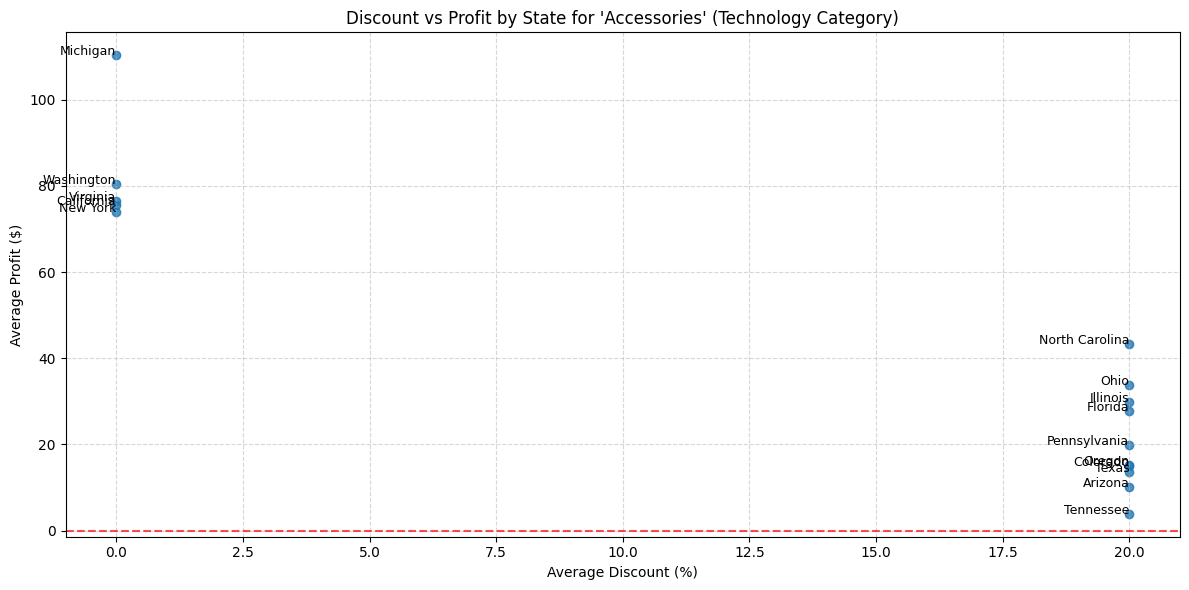

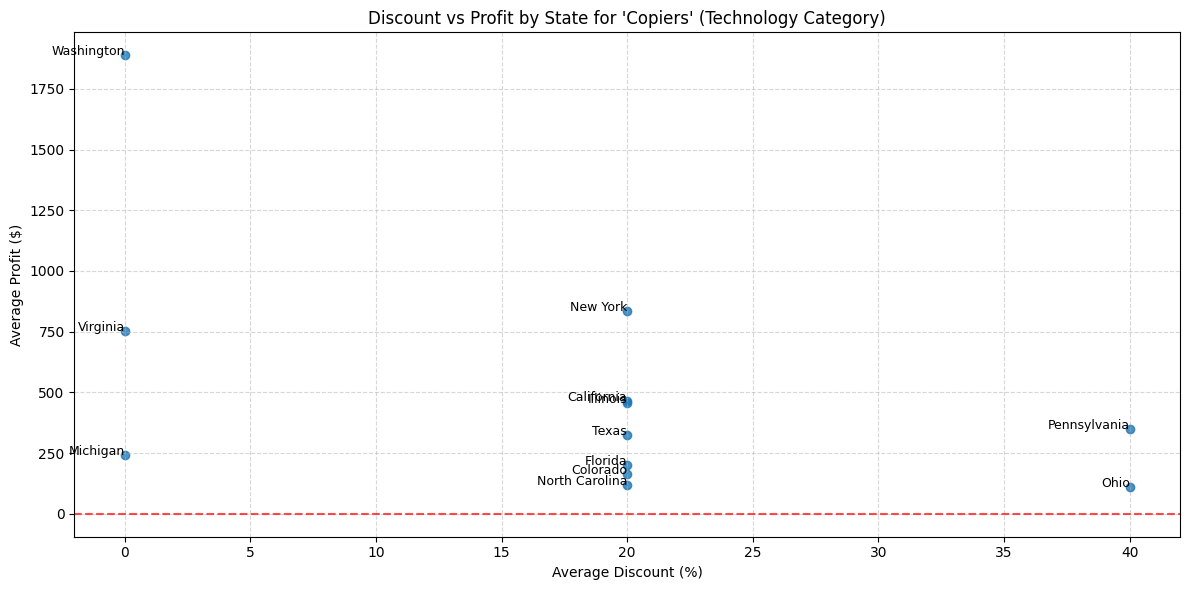

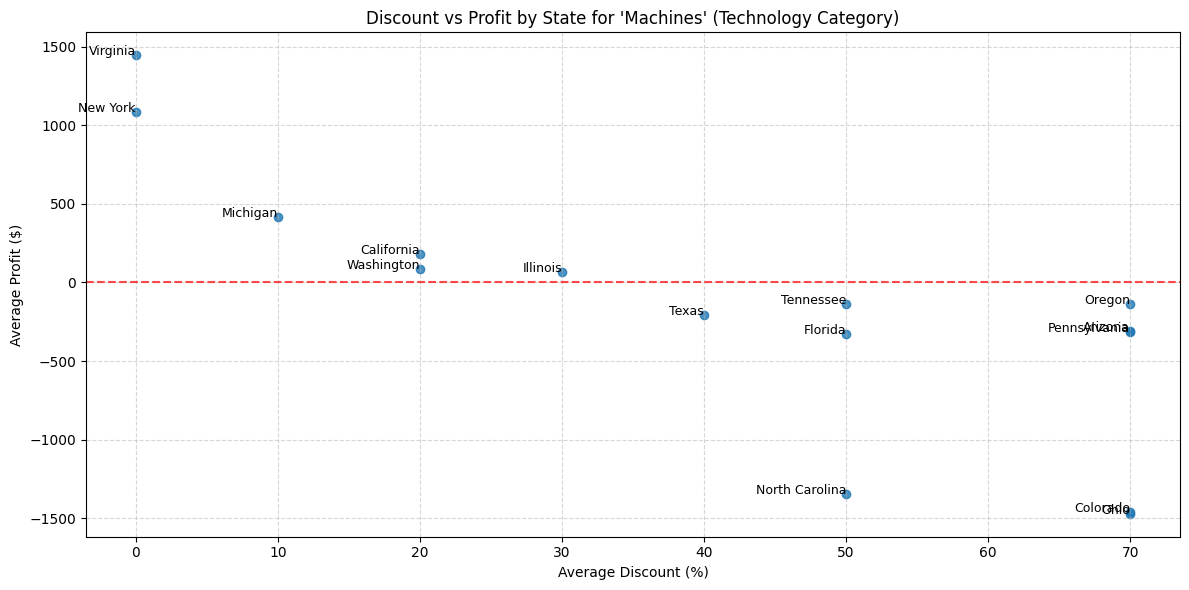

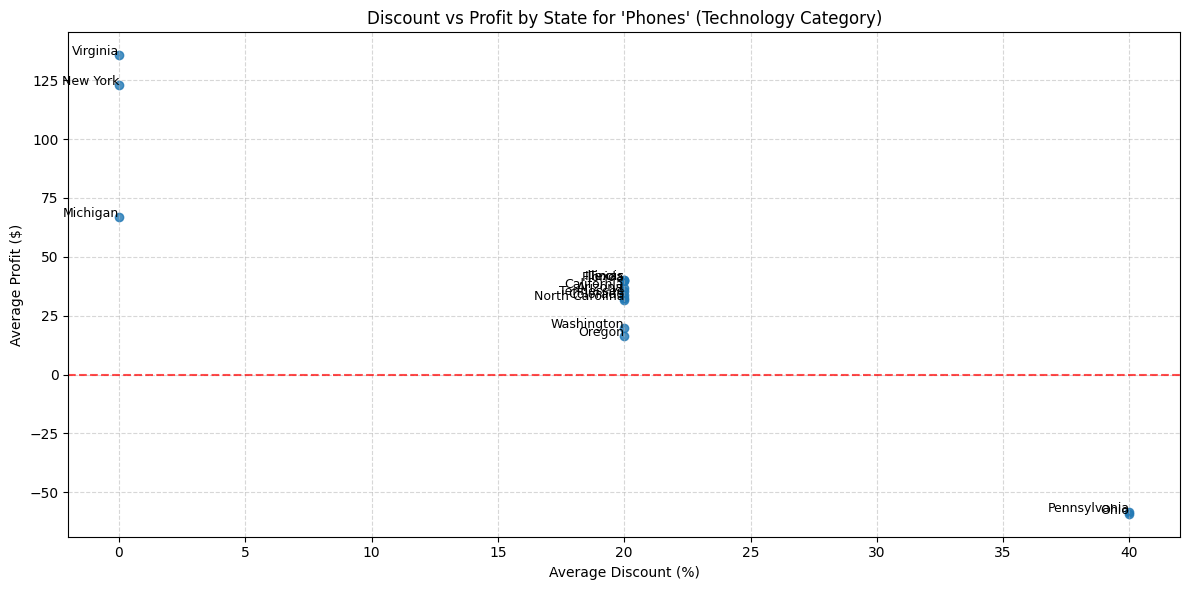

In [42]:
# Just to confirm, let's compare them to our profit making states.

selected_states = [
    "Texas", "Ohio", "Pennsylvania", "Illinois", "North Carolina",
    "Colorado", "Tennessee", "Arizona", "Florida", "Oregon", "New York",
    "Washington", "California", "Michigan", "Virginia"
]

# Filter for Technology category and selected states
technology_selected_states = df[
    (df["Category"] == "Technology") &
    (df["State"].isin(selected_states))
]

# Group by Sub-Category and State, calculate mean Discount and Profit
tech_subcat_summary = technology_selected_states.groupby(
    ["Sub-Category", "State"]
)[["Discount", "Profit"]].mean().reset_index()

# Get unique sub-categories
subcategories = tech_subcat_summary["Sub-Category"].unique()

# Create scatter plots for each sub-category
for sub_category in subcategories:
    subcat_data = tech_subcat_summary[
        tech_subcat_summary["Sub-Category"] == sub_category
    ]
    
    plt.figure(figsize=(12, 6))
    plt.scatter(subcat_data["Discount"] * 100, subcat_data["Profit"], alpha=0.8)
    
    # Annotate points with state names
    for i, row in subcat_data.iterrows():
        plt.text(row["Discount"] * 100, row["Profit"], row["State"], fontsize=9, ha='right')
    
    plt.xlabel("Average Discount (%)")
    plt.ylabel("Average Profit ($)")
    plt.title(f"Discount vs Profit by State for '{sub_category}' (Technology Category)")
    plt.axhline(0, color="red", linestyle="--", alpha=0.7)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [ ]:
# As you can see, the profit making states are discounting at prefferable rates and generating profits.


In [ ]:
### Findings on Discount Rates and Profits in the Technology Category

1. **General Observations**:
    - Discounts past the 20% mark generally lead to reduced profits across most sub-categories.
    - The 20-30% discount range is a low-profit zone for the Machines sub-category, and discounts beyond 30% result in losses.
    - For Phones, profits start to diminish significantly at the 20% discount mark.

2. **Loss-Making States**:
    - States such as Texas, Ohio, Pennsylvania, Illinois, and North Carolina are among the biggest loss-makers in the Technology category.
    - Machines and Phones are the primary sub-categories contributing to losses in these states.

3. **Sub-Category Analysis**:
    - Machines:
      - Discounts in the 20-30% range yield very low profits.
      - Discounts exceeding 30% lead to consistent losses.
    - Phones:
      - Discounts beyond 20% result in diminishing profits and eventual losses.

4. **State-Level Insights**:
    - Ohio and North Carolina show significant losses in the Machines sub-category due to excessive discounting.
    - Ohio and Pennsylvania exhibit similar patterns for the Phones sub-category.

5. **Profit-Making States**:
    - States like New York, Washington, California, Michigan, and Virginia maintain profitable discounting strategies.
    - These states generally keep discounts below the critical thresholds identified for Machines and Phones.

6. **Recommendations**:
    - Scale back discounts for Machines to below 20% in loss-making states.
    - Limit discounts for Phones to 20% or less to maintain profitability.
    - Reassess discount strategies in loss-making states to align with those of profit-making states.

### Conclusion
The analysis confirms that excessive discounting is a key factor driving losses in the Technology category, particularly in the Machines and Phones sub-categories. Adjusting discount rates to optimal levels can significantly improve profitability.